In [8]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\Asma\Downloads/'



In [9]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'C:\\Users\\Asma\\Downloads\\Crimes_-_2001_to_Present.csv'

In [10]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [11]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957248,12131776,JD327752,08/10/2020 08:30:00 PM,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,17.0,66.0,05,1157527.0,1860392.0,2020,08/17/2020 03:41:32 PM,41.772671,-87.698104,"(41.772671069, -87.698104059)"
7957249,12082414,JD269218,06/18/2020 09:00:00 PM,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,9.0,49.0,06,1180558.0,1843036.0,2020,06/25/2020 03:41:40 PM,41.724546,-87.614211,"(41.724546436, -87.614210743)"
7957250,12118237,JD311791,07/27/2020 03:02:00 PM,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,24.0,27.0,08B,1154169.0,1896171.0,2020,08/03/2020 03:41:51 PM,41.870921,-87.709461,"(41.870920735, -87.709461362)"
7957251,12142591,JD340297,08/14/2020 03:00:00 PM,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,50.0,2.0,07,1159419.0,1941765.0,2020,08/26/2020 03:40:41 PM,41.995927,-87.688929,"(41.995927389, -87.688928533)"


In [12]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
3981323,3769790,HL141452,01/01/2001 01:00:00 PM,121XX S LOWE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,...,53.0,06,1174215.0,1824262.0,2001,03/31/2006 10:03:38 PM,41.673171,-87.638000,"(41.673170821, -87.638000169)",2001-01-01 01:00:00
2214132,1313086,G004657,01/01/2001 01:00:00 PM,039XX N DRAKE AV,0810,THEFT,OVER $500,OTHER,False,False,...,NaN,06,1151978.0,1926092.0,2001,08/17/2015 03:03:40 PM,41.953070,-87.716716,"(41.953070112, -87.716715611)",2001-01-01 01:00:00
2194903,1323184,G017467,01/01/2001 01:00:00 PM,102XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,NaN,26,1166196.0,1836771.0,2001,08/17/2015 03:03:40 PM,41.707671,-87.666996,"(41.707671475, -87.666996186)",2001-01-01 01:00:00
2229319,1312658,G004147,01/01/2001 01:00:00 AM,040XX W CORTLAND ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,08B,1149393.0,1912364.0,2001,08/17/2015 03:03:40 PM,41.915450,-87.726575,"(41.915449949, -87.726575474)",2001-01-01 01:00:00
2180779,1311503,G001102,01/01/2001 01:00:00 AM,026XX N HALSTED ST,0264,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,...,NaN,02,1170510.0,1918326.0,2001,08/17/2015 03:03:40 PM,41.931374,-87.648819,"(41.931373805, -87.648818936)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172966,13302573,JG533777,12/08/2023 12:00:00 AM,009XX E 40TH ST,0560,ASSAULT,SIMPLE,SIDEWALK,False,True,...,36.0,08A,1183198.0,1878599.0,2023,12/15/2023 03:47:28 PM,41.822074,-87.603435,"(41.822073733, -87.603434976)",2023-12-08 12:00:00
172902,13301440,JG533123,12/08/2023 12:00:00 AM,010XX E 47TH ST,0460,BATTERY,SIMPLE,SCHOOL - PUBLIC BUILDING,False,False,...,39.0,08B,1184079.0,1874062.0,2023,12/15/2023 03:47:28 PM,41.809603,-87.600345,"(41.809603298, -87.600345002)",2023-12-08 12:00:00
172970,13301030,JG532825,12/08/2023 12:00:00 AM,058XX S KOLMAR AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,62.0,08B,1147032.0,1865483.0,2023,12/15/2023 03:47:28 PM,41.786848,-87.736447,"(41.786847889, -87.736446857)",2023-12-08 12:00:00
173491,13301329,JG532987,12/08/2023 12:00:00 AM,028XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,60.0,14,1173646.0,1885941.0,2023,12/15/2023 03:47:28 PM,41.842438,-87.638259,"(41.842438142, -87.638258768)",2023-12-08 12:00:00


In [14]:
chicago_full['Datetime'].dt.year

3981323    2001
2214132    2001
2194903    2001
2229319    2001
2180779    2001
           ... 
172966     2023
172902     2023
172970     2023
173491     2023
173219     2023
Name: Datetime, Length: 7957253, dtype: int64

In [15]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486811
2001    485902
2003    475987
2004    469428
2005    453775
2006    448179
2007    437090
2008    427189
2009    392830
2010    370521
2011    351999
2012    336329
2013    307548
2014    275805
2016    269853
2017    269120
2018    268933
2015    264814
2019    261396
2023    243400
2022    239088
2020    212274
2021    208982
Name: Year, dtype: int64

In [16]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [17]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000
2001-01-01 01:00:00,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,2001,41.953070,-87.716716
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,41.707671,-87.666996
2001-01-01 01:00:00,1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,2001,41.915450,-87.726575
2001-01-01 01:00:00,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,2001,41.931374,-87.648819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-08 12:00:00,13302573,12/08/2023 12:00:00 AM,ASSAULT,SIMPLE,SIDEWALK,False,True,214,2.0,4.0,2023,41.822074,-87.603435
2023-12-08 12:00:00,13301440,12/08/2023 12:00:00 AM,BATTERY,SIMPLE,SCHOOL - PUBLIC BUILDING,False,False,222,2.0,4.0,2023,41.809603,-87.600345
2023-12-08 12:00:00,13301030,12/08/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,813,8.0,13.0,2023,41.786848,-87.736447


In [ ]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

In [ ]:
FINAL_DROP = ['Year']

In [ ]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

In [ ]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

In [ ]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

In [ ]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

In [ ]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

1) Comparing Police Districts:
Which district has the most crimes? Which has the least?

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df_ts = chicago_final.groupby("District").resample("Y").sum()
df_ts

ID  Arrest  Domestic     Beat  District  \
District Datetime                                                       
1.0      2001-12-31  24302919537    4420       649  1840105   14861.0   
         2002-12-31  40208821903    6226      1383  7609713   17974.0   
         2003-12-31  49739691659    6603      1243  5959056   17571.0   
         2004-12-31  60480353024    6501      1193  6656934   17579.0   
         2005-12-31  73405359944    7224      1115  7540502   17700.0   
...                          ...     ...       ...      ...       ...   
31.0     2019-12-31     83169442       1         0    11491     217.0   
         2020-12-31     48381476       1         1     6614     124.0   
         2021-12-31    186523581       4         2    23569     465.0   
         2022-12-31    178312861       8         0    19859     434.0   
         2023-12-31    183393494       2         0    24651     434.0   

                         Ward       Latitude     Longitude  
District Datetime                                           
1.0      2001-12-31    3337.0  611376.898507 -1.279313e+06  
         2002-12-31  240121.0  729511.040232 -1.526759e+06  
         2003-12-31  313211.0  728794.301662 -1.525269e+06  
         2004-12-31  308895.0  733422.748422 -1.534987e+06  
         2005-12-31  287942.0  733396.753264 -1.534983e+06  
...                       ...            ...           ...  
31.0     2019-12-31     287.0     293.874212 -6.150893e+02  
         2020-12-31     164.0     167.921493 -3.515420e+02  
         2021-12-31     581.0     629.688603 -1.318413e+03  
         2022-12-31     550.0     587.712274 -1.230054e+03  
         2023-12-31     489.0     587.983299 -1.230247e+03  

[530 rows x 8 columns]

In [12]:
df_ts.head().index

MultiIndex([(1.0, '2001-12-31'),
            (1.0, '2002-12-31'),
            (1.0, '2003-12-31'),
            (1.0, '2004-12-31'),
            (1.0, '2005-12-31')],
           names=['District', 'Datetime'])

In [13]:
unstacked = df_ts['District'].unstack(level=0)
unstacked

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,25.0,31.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,14861.0,70816.0,72939.0,100484.0,100035.0,152928.0,186221.0,250848.0,216828.0,196510.0,...,256288.0,246313.0,405486.0,432421.0,199780.0,NaN,329032.0,362688.0,698275.0,NaN
2002-12-31,17974.0,54096.0,70668.0,103332.0,105480.0,151896.0,196889.0,256800.0,227835.0,194620.0,...,257024.0,245310.0,401670.0,435157.0,183060.0,NaN,344850.0,360504.0,695825.0,279.0
2003-12-31,17571.0,50200.0,70740.0,104584.0,99755.0,152772.0,195055.0,253672.0,227700.0,190860.0,...,254048.0,237592.0,366840.0,408234.0,165240.0,21.0,329142.0,334440.0,709425.0,341.0
2004-12-31,17579.0,47522.0,72834.0,104572.0,102510.0,156654.0,201159.0,251232.0,213309.0,203660.0,...,232368.0,222020.0,363114.0,399779.0,167400.0,63.0,339680.0,345552.0,674800.0,186.0
2005-12-31,17700.0,43922.0,72675.0,99964.0,101860.0,153708.0,192269.0,250832.0,205839.0,192720.0,...,227792.0,223414.0,337698.0,371108.0,174620.0,NaN,332442.0,343776.0,661775.0,155.0
2006-12-31,16952.0,40372.0,70701.0,103964.0,99755.0,150900.0,192395.0,258160.0,211572.0,183160.0,...,228720.0,222071.0,331542.0,358815.0,163600.0,NaN,327008.0,340512.0,621425.0,217.0
2007-12-31,15651.0,38738.0,69348.0,101848.0,104105.0,161982.0,192220.0,248856.0,195480.0,183390.0,...,226480.0,202878.0,326700.0,353248.0,146060.0,NaN,329560.0,311928.0,618275.0,465.0
2008-12-31,15851.0,35560.0,64863.0,99916.0,96230.0,156270.0,192010.0,246872.0,188649.0,177260.0,...,239904.0,213588.0,319176.0,351747.0,140440.0,NaN,314534.0,308448.0,620050.0,682.0
2009-12-31,13396.0,33518.0,61668.0,92224.0,90065.0,140112.0,163730.0,229112.0,174636.0,159240.0,...,217152.0,198118.0,289386.0,323988.0,125980.0,NaN,298166.0,284376.0,624700.0,682.0


In [17]:
unstacked.isna().sum()

District
1.0     0
2.0     0
3.0     0
4.0     0
5.0     0
6.0     0
7.0     0
8.0     0
9.0     0
10.0    0
11.0    0
12.0    0
14.0    0
15.0    0
16.0    0
17.0    0
18.0    0
19.0    0
20.0    0
21.0    0
22.0    0
24.0    0
25.0    0
31.0    0
dtype: int64

In [18]:
unstacked.fillna(0,inplace=True)
unstacked.isna().sum()

District
1.0     0
2.0     0
3.0     0
4.0     0
5.0     0
6.0     0
7.0     0
8.0     0
9.0     0
10.0    0
11.0    0
12.0    0
14.0    0
15.0    0
16.0    0
17.0    0
18.0    0
19.0    0
20.0    0
21.0    0
22.0    0
24.0    0
25.0    0
31.0    0
dtype: int64

In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

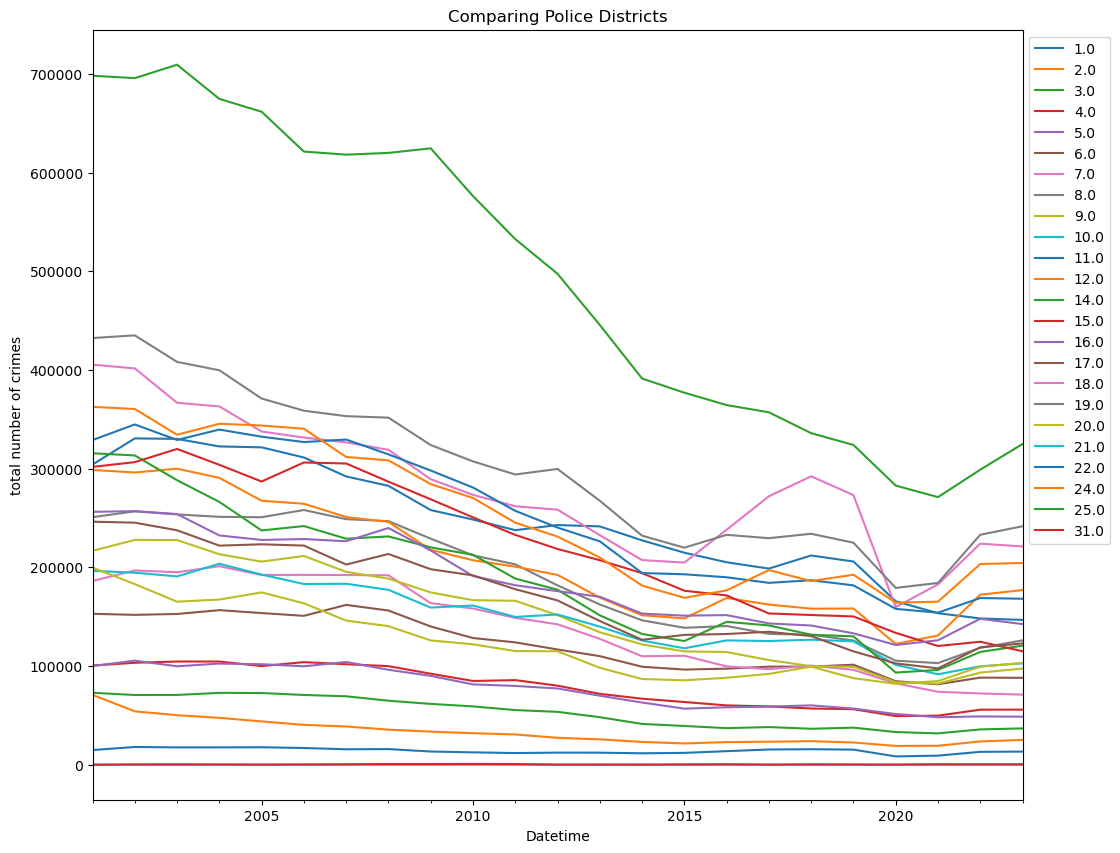

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Comparing Police Districts')
ax.set_ylabel('total number of crimes')
unstacked.plot(ax=ax)
ax.legend(bbox_to_anchor=[1,1]);

Police district 3 has the most crimes and Police district 31 has the least ones.

2) Crimes Across the Years:
Is the total number of crimes increasing or decreasing across the years?
Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [21]:
df_crimes = chicago_final.groupby("Primary Type").resample("Y").sum()
df_crimes

ID  Arrest  Domestic     Beat  \
Primary Type      Datetime                                              
ARSON             2001-12-31    1635830865     181        60  1247579   
                  2002-12-31    2288357434     156        72  1287303   
                  2003-12-31    2703076345     140        53  1128192   
                  2004-12-31    2646181864     109        37   992253   
                  2005-12-31    2850867321     121        40   843632   
...                                    ...     ...       ...      ...   
WEAPONS VIOLATION 2019-12-31   74471980828    4224        49  6100494   
                  2020-12-31  102154848702    5448        35  8108066   
                  2021-12-31  111493649779    5560        58  8995601   
                  2022-12-31  111909467040    5391        71  8729474   
                  2023-12-31  107169545891    4739        37  7947119   

                              District      Ward       Latitude      Longitude  
Primary Type      Datetime                                                      
ARSON             2001-12-31   11870.0     103.0   42047.307400  -88118.160187  
                  2002-12-31   12169.0   15924.0   40922.433732  -85752.010876  
                  2003-12-31   10627.0   19981.0   39863.754410  -83554.299139  
                  2004-12-31    9509.0   17373.0   32384.111791  -67867.324658  
                  2005-12-31    7930.0   15043.0   28785.106692  -60323.991343  
...                                ...       ...            ...            ...  
WEAPONS VIOLATION 2019-12-31   59551.0  122190.0  264977.937719 -555625.593886  
                  2020-12-31   79120.0  163744.0  351911.729617 -737889.451103  
                  2021-12-31   87874.0  180362.0  374011.308683 -784180.519071  
                  2022-12-31   85257.0  173211.0  363990.502060 -763122.776922  
                  2023-12-31   77540.0  155714.0  341647.172109 -716304.459848  

[754 rows x 8 columns]

In [22]:
df_crimes=df_crimes.drop(columns=['ID','Latitude','Longitude','District'])
df_crimes

Arrest  Domestic     Beat      Ward
Primary Type      Datetime                                       
ARSON             2001-12-31     181        60  1247579     103.0
                  2002-12-31     156        72  1287303   15924.0
                  2003-12-31     140        53  1128192   19981.0
                  2004-12-31     109        37   992253   17373.0
                  2005-12-31     121        40   843632   15043.0
...                              ...       ...      ...       ...
WEAPONS VIOLATION 2019-12-31    4224        49  6100494  122190.0
                  2020-12-31    5448        35  8108066  163744.0
                  2021-12-31    5560        58  8995601  180362.0
                  2022-12-31    5391        71  8729474  173211.0
                  2023-12-31    4739        37  7947119  155714.0

[754 rows x 4 columns]

In [23]:
df_crimes['Total'] = df_crimes.sum(axis=1)
df_crimes

Arrest  Domestic     Beat      Ward      Total
Primary Type      Datetime                                                  
ARSON             2001-12-31     181        60  1247579     103.0  1247923.0
                  2002-12-31     156        72  1287303   15924.0  1303455.0
                  2003-12-31     140        53  1128192   19981.0  1148366.0
                  2004-12-31     109        37   992253   17373.0  1009772.0
                  2005-12-31     121        40   843632   15043.0   858836.0
...                              ...       ...      ...       ...        ...
WEAPONS VIOLATION 2019-12-31    4224        49  6100494  122190.0  6226957.0
                  2020-12-31    5448        35  8108066  163744.0  8277293.0
                  2021-12-31    5560        58  8995601  180362.0  9181581.0
                  2022-12-31    5391        71  8729474  173211.0  8908147.0
                  2023-12-31    4739        37  7947119  155714.0  8107609.0

[754 rows x 5 columns]

In [24]:
unstacked1 = df_crimes['Total'].unstack(level=0)
unstacked1

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1247923.0,36731941.0,107369729.0,32930198.0,1874.0,2033038.0,69510417.0,36046.0,16216875.0,19359912.0,...,37800742.0,7760130.0,7990.0,3346774.0,10351.0,22497889.0,2898454.0,249258.0,127373818.0,4872691.0
2002-12-31,1303455.0,36392725.0,108505120.0,33547511.0,0.0,2103134.0,69763907.0,29388.0,16865721.0,18739165.0,...,40954313.0,8941326.0,10543.0,3059329.0,1487.0,22280692.0,2823464.0,236598.0,129602691.0,4968735.0
2003-12-31,1148366.0,33737712.0,102350907.0,32520912.0,0.0,1857905.0,69343004.0,53251.0,17498957.0,18115405.0,...,38420623.0,8760709.0,8908.0,3137269.0,1152.0,21028878.0,2690959.0,281150.0,129879637.0,4948874.0
2004-12-31,1009772.0,33213385.0,100961299.0,31478765.0,0.0,1781414.0,66868221.0,45059.0,18612585.0,17783431.0,...,36864373.0,9569366.0,15605.0,3267483.0,441.0,19380615.0,2361780.0,261131.0,125489830.0,4997605.0
2005-12-31,858836.0,31472892.0,97770947.0,32422831.0,0.0,1794528.0,67717723.0,43364.0,19725749.0,18041188.0,...,35204449.0,8441261.0,5116.0,3535828.0,953.0,19190928.0,2409653.0,214849.0,111961567.0,4707286.0
2006-12-31,896445.0,30279247.0,93967170.0,30535693.0,0.0,1679968.0,70916097.0,55841.0,16991935.0,18245443.0,...,34443802.0,9050476.0,3738.0,3874501.0,8862.0,18554594.0,2043525.0,214232.0,112125075.0,4249707.0
2007-12-31,894649.0,30347888.0,92876861.0,30316970.0,0.0,1707541.0,66900511.0,62168.0,15886596.0,18632677.0,...,34021086.0,7510162.0,9380.0,4209324.0,2570.0,17414589.0,2014361.0,236760.0,110684962.0,3939292.0
2008-12-31,779442.0,29494082.0,89156442.0,31828394.0,0.0,1804882.0,65957476.0,65799.0,13769163.0,19610799.0,...,33229080.0,6324978.0,5744.0,3682050.0,0.0,19193218.0,1940396.0,225546.0,115957252.0,4192738.0
2009-12-31,765829.0,26699071.0,81350074.0,32359322.0,0.0,1629825.0,59636130.0,60445.0,12728873.0,18485179.0,...,32048438.0,4675210.0,12167.0,3784333.0,0.0,18819424.0,1624716.0,217480.0,107201099.0,4495542.0


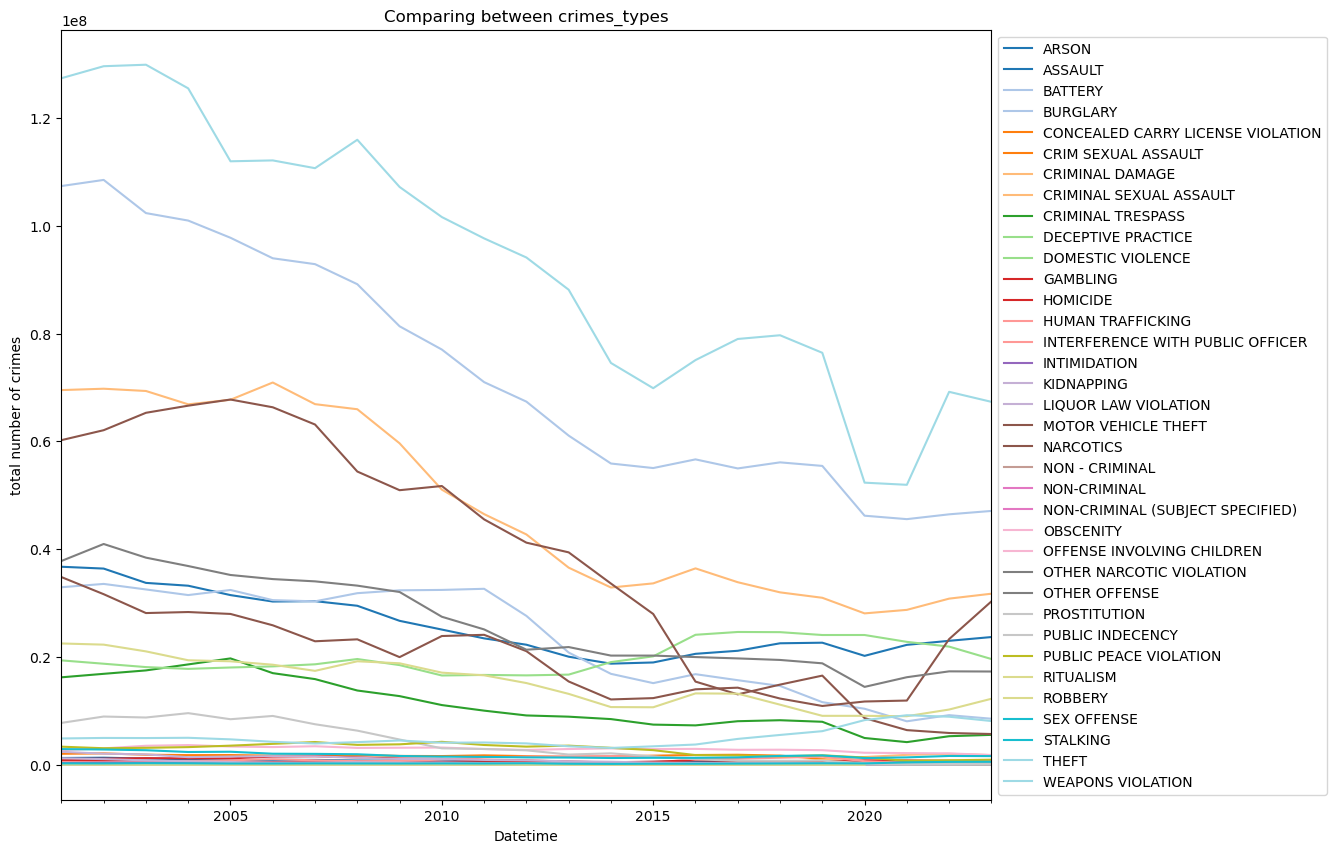

In [25]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Comparing between crimes_types')
ax.set_ylabel('total number of crimes')
unstacked1.plot(ax=ax, colormap='tab20')
ax.legend(bbox_to_anchor=[1,1]);

 The total number of crimes is decreasing across the years, except for robbery, assault and motor vehicle theft that shows an increase starting from 2021.

3) Comparing AM vs. PM Rush Hour:
Are crimes more common during AM rush hour or PM rush hour?

You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour

You can consider any crime that occurred between 4 -7 PM as PM rush hour.

What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [64]:
chicago = chicago_full.drop(columns=drop_cols)
chicago

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,Datetime
3981323,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000,2001-01-01 01:00:00
2214132,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,2001,41.953070,-87.716716,2001-01-01 01:00:00
2194903,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,41.707671,-87.666996,2001-01-01 01:00:00
2229319,1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,2001,41.915450,-87.726575,2001-01-01 01:00:00
2180779,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,2001,41.931374,-87.648819,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172966,13302573,12/08/2023 12:00:00 AM,ASSAULT,SIMPLE,SIDEWALK,False,True,214,2.0,4.0,2023,41.822074,-87.603435,2023-12-08 12:00:00
172902,13301440,12/08/2023 12:00:00 AM,BATTERY,SIMPLE,SCHOOL - PUBLIC BUILDING,False,False,222,2.0,4.0,2023,41.809603,-87.600345,2023-12-08 12:00:00
172970,13301030,12/08/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,813,8.0,13.0,2023,41.786848,-87.736447,2023-12-08 12:00:00
173491,13301329,12/08/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,914,9.0,11.0,2023,41.842438,-87.638259,2023-12-08 12:00:00


In [65]:
chicago=chicago.drop(columns=['ID','Latitude','Longitude','District','Year','District','Location Description'])
chicago

,Date,Primary Type,Description,Arrest,Domestic,Beat,Ward,Datetime
3981323,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,False,False,523,34.0,2001-01-01 01:00:00
2214132,01/01/2001 01:00:00 PM,THEFT,OVER $500,False,False,1732,NaN,2001-01-01 01:00:00
2194903,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,False,2213,NaN,2001-01-01 01:00:00
2229319,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,False,False,2534,NaN,2001-01-01 01:00:00
2180779,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,1933,NaN,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...
172966,12/08/2023 12:00:00 AM,ASSAULT,SIMPLE,False,True,214,4.0,2023-12-08 12:00:00
172902,12/08/2023 12:00:00 AM,BATTERY,SIMPLE,False,False,222,4.0,2023-12-08 12:00:00
172970,12/08/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,813,13.0,2023-12-08 12:00:00
173491,12/08/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,914,11.0,2023-12-08 12:00:00


In [66]:
chicago = chicago.set_index('Datetime')
chicago

,Date,Primary Type,Description,Arrest,Domestic,Beat,Ward
Datetime,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,False,False,523,34.0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,OVER $500,False,False,1732,NaN
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,False,2213,NaN
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,False,False,2534,NaN
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,1933,NaN
...,...,...,...,...,...,...,...
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,ASSAULT,SIMPLE,False,True,214,4.0
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,BATTERY,SIMPLE,False,False,222,4.0
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,813,13.0


In [67]:
chicago[['date','time','AM/PM']] = chicago['Date'].str.split(' ', expand=True)
chicago

,Date,Primary Type,Description,Arrest,Domestic,Beat,Ward,date,time,AM/PM
Datetime,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,False,False,523,34.0,01/01/2001,01:00:00,PM
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,OVER $500,False,False,1732,NaN,01/01/2001,01:00:00,PM
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,False,2213,NaN,01/01/2001,01:00:00,PM
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,False,False,2534,NaN,01/01/2001,01:00:00,AM
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,1933,NaN,01/01/2001,01:00:00,AM
...,...,...,...,...,...,...,...,...,...,...
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,ASSAULT,SIMPLE,False,True,214,4.0,12/08/2023,12:00:00,AM
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,BATTERY,SIMPLE,False,False,222,4.0,12/08/2023,12:00:00,AM
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,813,13.0,12/08/2023,12:00:00,AM


In [42]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7957253 entries, 2001-01-01 01:00:00 to 2023-12-08 12:00:00
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Date          object 
 1   Primary Type  object 
 2   Description   object 
 3   Arrest        bool   
 4   Domestic      bool   
 5   Beat          int64  
 6   Ward          float64
 7   date          object 
 8   time          object 
 9   AM/PM         object 
dtypes: bool(2), float64(1), int64(1), object(6)
memory usage: 561.6+ MB


In [68]:
chicago["Period"] = chicago[["time", "AM/PM"]].apply(" ".join, axis=1)
chicago

,Date,Primary Type,Description,Arrest,Domestic,Beat,Ward,date,time,AM/PM,Period
Datetime,,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,False,False,523,34.0,01/01/2001,01:00:00,PM,01:00:00 PM
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,OVER $500,False,False,1732,NaN,01/01/2001,01:00:00,PM,01:00:00 PM
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,False,2213,NaN,01/01/2001,01:00:00,PM,01:00:00 PM
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,False,False,2534,NaN,01/01/2001,01:00:00,AM,01:00:00 AM
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,False,False,1933,NaN,01/01/2001,01:00:00,AM,01:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,ASSAULT,SIMPLE,False,True,214,4.0,12/08/2023,12:00:00,AM,12:00:00 AM
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,BATTERY,SIMPLE,False,False,222,4.0,12/08/2023,12:00:00,AM,12:00:00 AM
2023-12-08 12:00:00,12/08/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,813,13.0,12/08/2023,12:00:00,AM,12:00:00 AM


In [69]:
chicago1=chicago.loc[(chicago['Period'] >= '07:00:00 AM') & (chicago['Period'] <= '10:00:00 AM')]
chicago1

,Date,Primary Type,Description,Arrest,Domestic,Beat,Ward,date,time,AM/PM,Period
Datetime,,,,,,,,,,,
2001-01-01 07:00:00,01/01/2001 07:00:00 AM,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,1524,NaN,01/01/2001,07:00:00,AM,07:00:00 AM
2001-01-01 07:00:00,01/01/2001 07:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,False,522,NaN,01/01/2001,07:00:00,AM,07:00:00 AM
2001-01-01 07:00:00,01/01/2001 07:00:00 AM,BURGLARY,UNLAWFUL ENTRY,False,False,1333,NaN,01/01/2001,07:00:00,AM,07:00:00 AM
2001-01-01 07:00:00,01/01/2001 07:00:00 PM,BATTERY,SIMPLE,False,True,924,NaN,01/01/2001,07:00:00,PM,07:00:00 PM
2001-01-01 07:00:00,01/01/2001 07:00:00 PM,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,False,True,2213,NaN,01/01/2001,07:00:00,PM,07:00:00 PM
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-07 10:00:00,12/07/2023 10:00:00 AM,BATTERY,SIMPLE,False,False,431,10.0,12/07/2023,10:00:00,AM,10:00:00 AM
2023-12-07 10:00:00,12/07/2023 10:00:00 AM,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,False,False,511,9.0,12/07/2023,10:00:00,AM,10:00:00 AM
2023-12-07 10:00:00,12/07/2023 10:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,2521,31.0,12/07/2023,10:00:00,AM,10:00:00 AM


In [70]:
chicago2=chicago.loc[(chicago['Period'] >= '04:00:00 PM') & (chicago['Period'] <= '07:00:00 PM')]
chicago2

,Date,Primary Type,Description,Arrest,Domestic,Beat,Ward,date,time,AM/PM,Period
Datetime,,,,,,,,,,,
2001-01-01 04:00:00,01/01/2001 04:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,False,False,2221,NaN,01/01/2001,04:00:00,PM,04:00:00 PM
2001-01-01 04:00:00,01/01/2001 04:00:00 PM,BURGLARY,FORCIBLE ENTRY,False,False,835,NaN,01/01/2001,04:00:00,PM,04:00:00 PM
2001-01-01 04:00:00,01/01/2001 04:00:00 PM,CRIMINAL DAMAGE,TO PROPERTY,False,False,1731,NaN,01/01/2001,04:00:00,PM,04:00:00 PM
2001-01-01 04:00:00,01/01/2001 04:00:00 PM,BATTERY,SIMPLE,True,True,2213,NaN,01/01/2001,04:00:00,PM,04:00:00 PM
2001-01-01 04:00:00,01/01/2001 04:00:00 PM,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,False,False,715,15.0,01/01/2001,04:00:00,PM,04:00:00 PM
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-07 07:00:00,12/07/2023 07:00:00 PM,SEX OFFENSE,NON-CONSENSUAL DISSEMINATION OF PRIVATE SEXUAL...,False,True,632,8.0,12/07/2023,07:00:00,PM,07:00:00 PM
2023-12-07 07:00:00,12/07/2023 07:00:00 PM,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,False,False,832,16.0,12/07/2023,07:00:00,PM,07:00:00 PM
2023-12-07 07:00:00,12/07/2023 07:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,421,7.0,12/07/2023,07:00:00,AM,07:00:00 AM


In [78]:
df_crimes_hours1 = chicago1.groupby("Period")['Primary Type'].value_counts()
df_crimes_hours1

Period       Primary Type       
07:00:00 AM  THEFT                  18919
             CRIMINAL DAMAGE         9824
             BURGLARY                8903
             MOTOR VEHICLE THEFT     6475
             BATTERY                 5378
                                    ...  
10:00:00 AM  HOMICIDE                  20
             NON-CRIMINAL               7
             HUMAN TRAFFICKING          2
             NON - CRIMINAL             2
             PUBLIC INDECENCY           2
Name: Primary Type, Length: 109652, dtype: int64

In [79]:
plot_df1 = df_crimes_hours1.to_frame('# of Crimes')
plot_df1

# of Crimes
Period      Primary Type                    
07:00:00 AM THEFT                      18919
            CRIMINAL DAMAGE             9824
            BURGLARY                    8903
            MOTOR VEHICLE THEFT         6475
            BATTERY                     5378
...                                      ...
10:00:00 AM HOMICIDE                      20
            NON-CRIMINAL                   7
            HUMAN TRAFFICKING              2
            NON - CRIMINAL                 2
            PUBLIC INDECENCY               2

[109652 rows x 1 columns]

In [80]:
unstacked2 = plot_df1['# of Crimes'].unstack(level=1)
unstacked2

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Period,,,,,,,,,,,,,,,,,,,,,
07:00:00 AM,32.0,1956.0,5378.0,8903.0,4.0,268.0,9824.0,92.0,898.0,2908.0,...,5109.0,420.0,1.0,93.0,NaN,983.0,290.0,65.0,18919.0,79.0
07:00:00 PM,57.0,6557.0,15645.0,9493.0,1.0,540.0,21511.0,170.0,2152.0,4166.0,...,8806.0,344.0,NaN,409.0,NaN,3048.0,479.0,67.0,40953.0,319.0
07:00:01 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07:00:01 PM,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
07:00:02 AM,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09:59:58 AM,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:59:58 PM,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
09:59:59 AM,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [81]:
unstacked2.fillna(0,inplace=True)
unstacked2.isna().sum()

Primary Type
ARSON                                0
ASSAULT                              0
BATTERY                              0
BURGLARY                             0
CONCEALED CARRY LICENSE VIOLATION    0
CRIM SEXUAL ASSAULT                  0
CRIMINAL DAMAGE                      0
CRIMINAL SEXUAL ASSAULT              0
CRIMINAL TRESPASS                    0
DECEPTIVE PRACTICE                   0
GAMBLING                             0
HOMICIDE                             0
HUMAN TRAFFICKING                    0
INTERFERENCE WITH PUBLIC OFFICER     0
INTIMIDATION                         0
KIDNAPPING                           0
LIQUOR LAW VIOLATION                 0
MOTOR VEHICLE THEFT                  0
NARCOTICS                            0
NON - CRIMINAL                       0
NON-CRIMINAL                         0
NON-CRIMINAL (SUBJECT SPECIFIED)     0
OBSCENITY                            0
OFFENSE INVOLVING CHILDREN           0
OTHER NARCOTIC VIOLATION             0
OTHER OFFENS

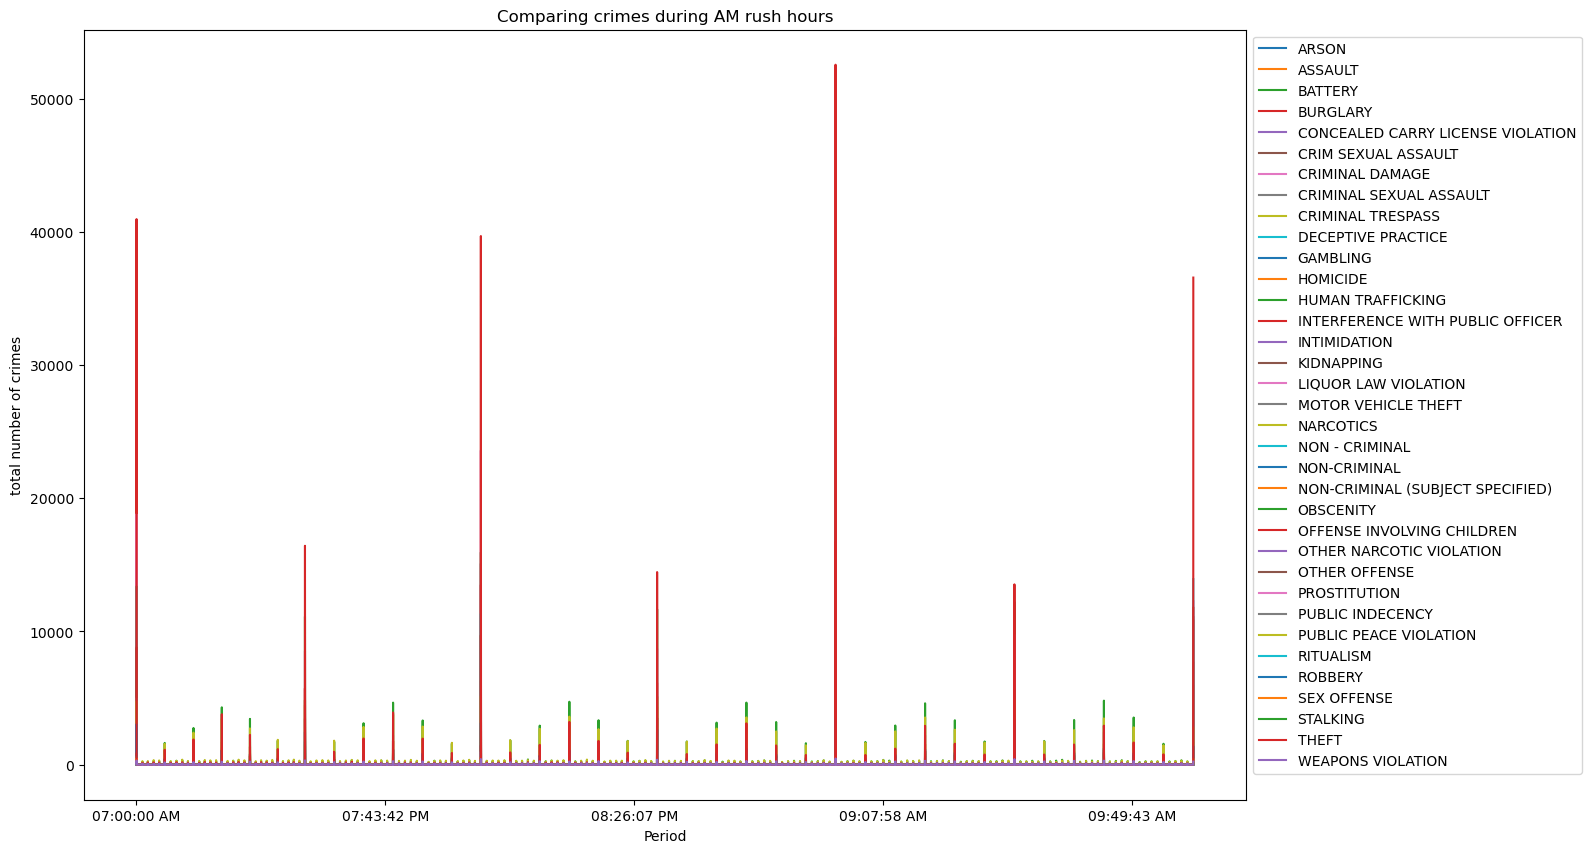

In [88]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Comparing crimes during AM rush hours')
ax.set_ylabel('total number of crimes')
unstacked2.plot(ax=ax)
ax.legend(bbox_to_anchor=[1,1]);

In [89]:
df_crimes_hours2 = chicago2.groupby("Period")['Primary Type'].value_counts()
df_crimes_hours2

Period       Primary Type                     
04:00:00 PM  THEFT                                40921
             CRIMINAL DAMAGE                      16633
             BATTERY                              15614
             BURGLARY                             10014
             MOTOR VEHICLE THEFT                   9432
                                                  ...  
07:00:00 PM  NON-CRIMINAL                             3
             HUMAN TRAFFICKING                        2
             OTHER NARCOTIC VIOLATION                 2
             CONCEALED CARRY LICENSE VIOLATION        1
             NON - CRIMINAL                           1
Name: Primary Type, Length: 95314, dtype: int64

In [90]:
plot_df2 = df_crimes_hours2.to_frame('# of Crimes')
plot_df2

# of Crimes
Period      Primary Type                                  
04:00:00 PM THEFT                                    40921
            CRIMINAL DAMAGE                          16633
            BATTERY                                  15614
            BURGLARY                                 10014
            MOTOR VEHICLE THEFT                       9432
...                                                    ...
07:00:00 PM NON-CRIMINAL                                 3
            HUMAN TRAFFICKING                            2
            OTHER NARCOTIC VIOLATION                     2
            CONCEALED CARRY LICENSE VIOLATION            1
            NON - CRIMINAL                               1

[95314 rows x 1 columns]

In [91]:
unstacked3 = plot_df2['# of Crimes'].unstack(level=1)
unstacked3

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Period,,,,,,,,,,,,,,,,,,,,,
04:00:00 PM,37.0,7684.0,15614.0,10014.0,1.0,488.0,16633.0,129.0,1938.0,7392.0,...,8920.0,106.0,3.0,401.0,NaN,2767.0,645.0,80.0,40921.0,227.0
04:00:01 AM,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04:00:01 PM,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
04:00:02 AM,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04:00:02 PM,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06:59:58 PM,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
06:59:59 AM,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06:59:59 PM,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [92]:
unstacked3.fillna(0,inplace=True)
unstacked3.isna().sum()

Primary Type
ARSON                                0
ASSAULT                              0
BATTERY                              0
BURGLARY                             0
CONCEALED CARRY LICENSE VIOLATION    0
CRIM SEXUAL ASSAULT                  0
CRIMINAL DAMAGE                      0
CRIMINAL SEXUAL ASSAULT              0
CRIMINAL TRESPASS                    0
DECEPTIVE PRACTICE                   0
GAMBLING                             0
HOMICIDE                             0
HUMAN TRAFFICKING                    0
INTERFERENCE WITH PUBLIC OFFICER     0
INTIMIDATION                         0
KIDNAPPING                           0
LIQUOR LAW VIOLATION                 0
MOTOR VEHICLE THEFT                  0
NARCOTICS                            0
NON - CRIMINAL                       0
NON-CRIMINAL                         0
NON-CRIMINAL (SUBJECT SPECIFIED)     0
OBSCENITY                            0
OFFENSE INVOLVING CHILDREN           0
OTHER NARCOTIC VIOLATION             0
OTHER OFFENS

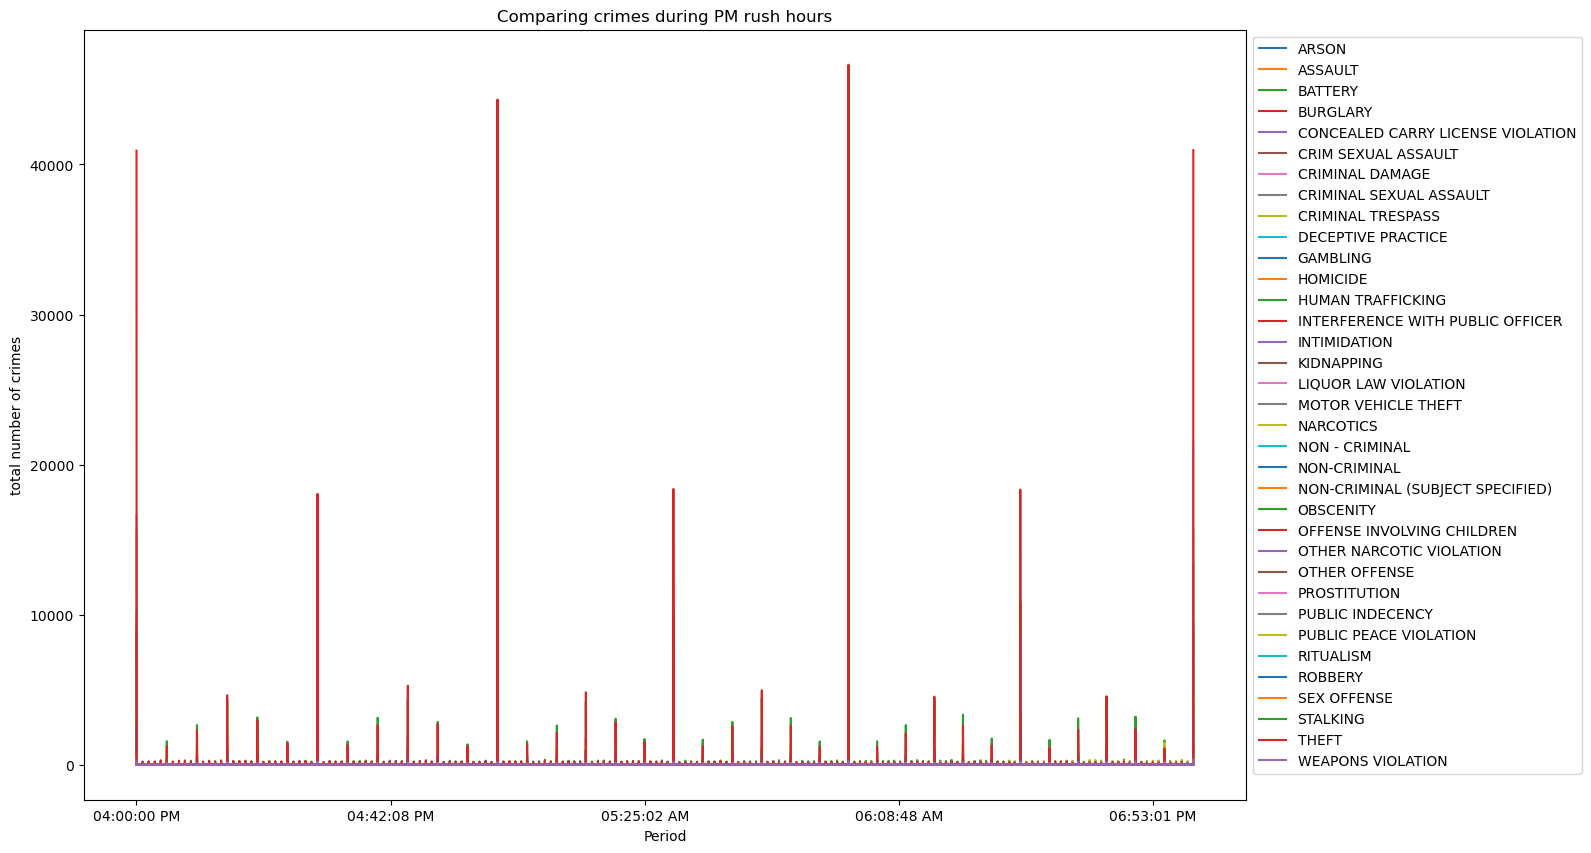

In [94]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Comparing crimes during PM rush hours')
ax.set_ylabel('total number of crimes')
unstacked3.plot(ax=ax)
ax.legend(bbox_to_anchor=[1,1]);

4) Comparing Months:
What months have the most crime? What months have the least?
Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [18]:
df_crimes_month = chicago_final.groupby("Primary Type").resample("MS").sum()
df_crimes_month

C:\Users\Asma\AppData\Local\Temp\ipykernel_24756\2674659075.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_crimes_month = chicago_final.groupby("Primary Type").resample("MS").sum()


ID  Arrest  Domestic    Beat  District  \
Primary Type      Datetime                                                      
ARSON             2001-01-01     89843098      14         5   91192     833.0   
                  2001-02-01     78745628       7         5   61995     606.0   
                  2001-03-01    132751797      17         4  101793     991.0   
                  2001-04-01    131876621      28         5  123415    1146.0   
                  2001-05-01    144075510      19        11  123230    1088.0   
...                                   ...     ...       ...     ...       ...   
WEAPONS VIOLATION 2023-08-01  10582138405     462         2  798889    7802.0   
                  2023-09-01   9512649931     400         8  729567    7126.0   
                  2023-10-01   9020113797     374         1  672540    6565.0   
                  2023-11-01   8697068201     365         4  643430    6279.0   
                  2023-12-01   1555766991      59         0  112441    1096.0   

                                 Ward      Latitude     Longitude  
Primary Type      Datetime                                         
ARSON             2001-01-01      0.0   2720.943994  -5699.137614  
                  2001-02-01      0.0   2384.584875  -4997.712757  
                  2001-03-01      0.0   3889.351107  -8154.006953  
                  2001-04-01      0.0   3683.008055  -7716.304982  
                  2001-05-01      0.0   3933.382835  -8241.182663  
...                               ...           ...           ...  
WEAPONS VIOLATION 2023-08-01  15631.0  33576.841653 -70394.406272  
                  2023-09-01  14365.0  30106.983200 -63117.326064  
                  2023-10-01  12810.0  28472.194720 -59700.223471  
                  2023-11-01  12413.0  27387.862999 -57420.220534  
                  2023-12-01   2237.0   4891.882151 -10256.128339  

[8965 rows x 8 columns]

In [20]:
unstacked_month = df_crimes_month['District'].unstack(level=0)
unstacked_month

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,833.0,22304.0,69482.0,23738.0,NaN,1628.0,48096.0,44.0,11928.0,16024.0,...,32895.0,7580.0,NaN,1837.0,36.0,15604.0,2436.0,285.0,91676.0,3452.0
2001-02-01,606.0,21603.0,64810.0,20448.0,NaN,1399.0,43754.0,7.0,11778.0,13544.0,...,29505.0,5622.0,16.0,2046.0,0.0,12887.0,1880.0,104.0,77043.0,3165.0
2001-03-01,991.0,31095.0,80317.0,21957.0,NaN,1650.0,54152.0,67.0,11557.0,14952.0,...,34634.0,7091.0,0.0,3060.0,24.0,15583.0,2184.0,143.0,89613.0,3839.0
2001-04-01,1146.0,29080.0,87722.0,22619.0,NaN,1422.0,57544.0,6.0,11713.0,13797.0,...,28746.0,6891.0,14.0,2621.0,15.0,14612.0,2049.0,363.0,90171.0,3322.0
2001-05-01,1088.0,31923.0,94183.0,23437.0,18.0,1642.0,55114.0,33.0,11545.0,14819.0,...,29726.0,6227.0,2.0,2580.0,14.0,16630.0,2790.0,145.0,97875.0,4108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,418.0,22782.0,43929.0,7594.0,264.0,NaN,29032.0,1697.0,4670.0,19340.0,...,14604.0,137.0,0.0,980.0,NaN,14917.0,1612.0,475.0,64523.0,7802.0
2023-09-01,507.0,22352.0,44365.0,7306.0,188.0,NaN,26948.0,1572.0,4529.0,15491.0,...,14780.0,250.0,0.0,726.0,NaN,13263.0,1669.0,571.0,60071.0,7126.0
2023-10-01,407.0,21469.0,42190.0,7503.0,236.0,NaN,28406.0,1456.0,4991.0,14587.0,...,15498.0,32.0,0.0,956.0,NaN,14252.0,1368.0,573.0,62909.0,6565.0


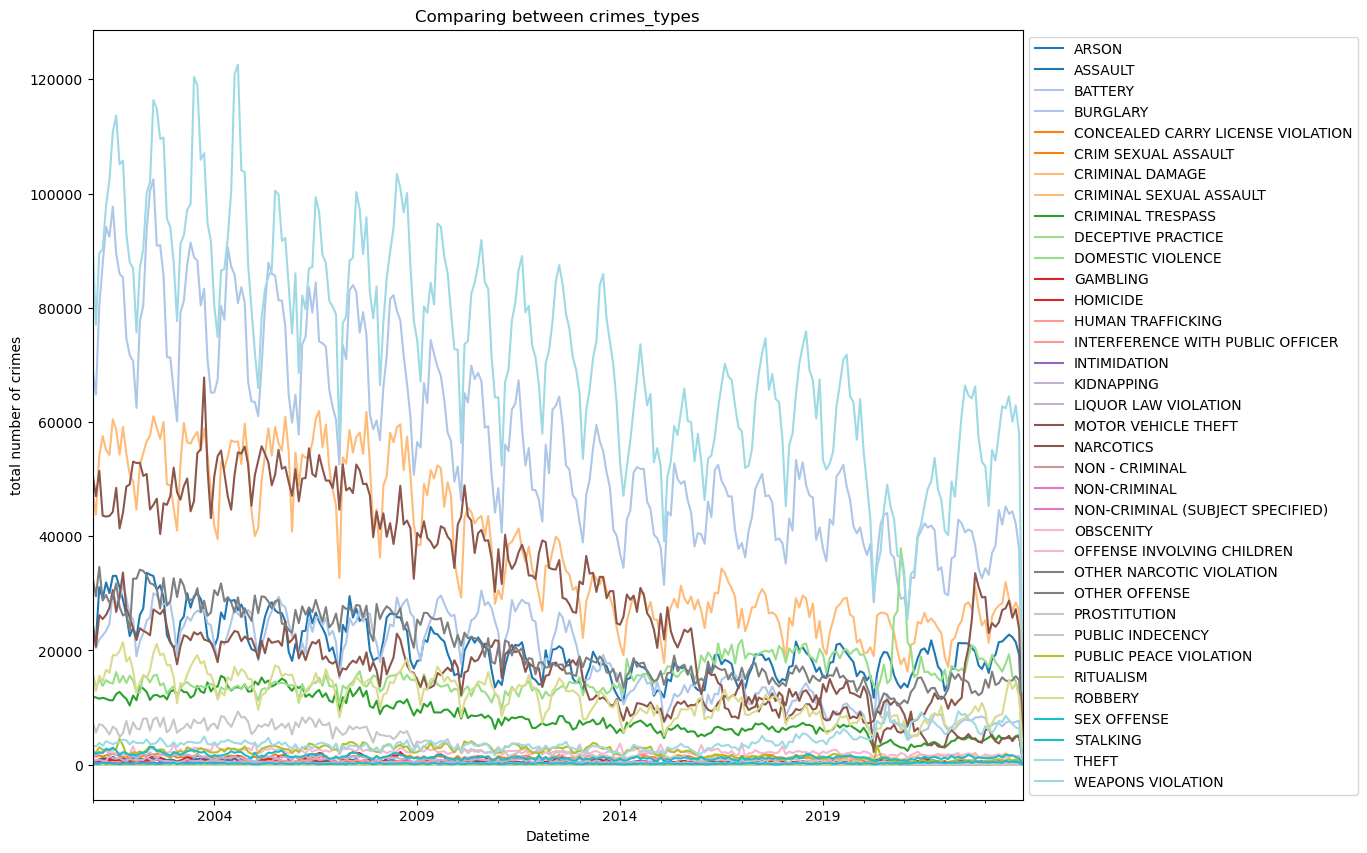

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Comparing between crimes_types')
ax.set_ylabel('total number of crimes')
unstacked_month.plot(ax=ax, colormap='tab20')
ax.legend(bbox_to_anchor=[1,1]);

Comparing Holidays:
Are there any holidays that show an increase in the # of crimes?
Are there any holidays that show a decrease in the # of crimes?

In [24]:
!pip install holidays

  Obtaining dependency information for holidays from https://files.pythonhosted.org/packages/5d/8c/bad7c11afc8969834728c0678bbf8f3ec5dba4c4ac7f5ad8cf91d63e865f/holidays-0.40-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/889.6 kB ? eta -:--:--
   - -------------------------------------- 30.7/889.6 kB ? eta -:--:--
   --- ----------------------------------- 71.7/889.6 kB 975.2 kB/s eta 0:00:01
   ---- ---------------------------------- 92.2/889.6 kB 871.5 kB/s eta 0:00:01
   ---- ---------------------------------- 92.2/889.6 kB 871.5 kB/s eta 0:00:01
   -------- ----------------------------- 194.6/889.6 kB 903.5 kB/s eta 0:00:01
   --------- ---------------------------- 225.3/889.6 kB 808.4 kB/s eta 0:00:01
   ---------- --------------------------- 235.5/889.6 kB 758.5 kB/s eta 0:00:01
   ---------- --------------------------- 235.5/889.6 kB 758.5 kB/s eta 0:00:01
   ---------- --------------------------- 235.5/889.6 kB 758.5 kB/s eta 0:00:01
   --------------

In [25]:
import holidays
import datetime as dt
from holidays import country_holidays

In [28]:
chicago_final[['date','time','AM/PM']] = chicago_final['Date'].str.split(' ', expand=True)
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,date,time,AM/PM
Datetime,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000,01/01/2001,01:00:00,PM
2001-01-01 01:00:00,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,2001,41.953070,-87.716716,01/01/2001,01:00:00,PM
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,41.707671,-87.666996,01/01/2001,01:00:00,PM
2001-01-01 01:00:00,1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,2001,41.915450,-87.726575,01/01/2001,01:00:00,AM
2001-01-01 01:00:00,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,2001,41.931374,-87.648819,01/01/2001,01:00:00,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-08 12:00:00,13302573,12/08/2023 12:00:00 AM,ASSAULT,SIMPLE,SIDEWALK,False,True,214,2.0,4.0,2023,41.822074,-87.603435,12/08/2023,12:00:00,AM
2023-12-08 12:00:00,13301440,12/08/2023 12:00:00 AM,BATTERY,SIMPLE,SCHOOL - PUBLIC BUILDING,False,False,222,2.0,4.0,2023,41.809603,-87.600345,12/08/2023,12:00:00,AM
2023-12-08 12:00:00,13301030,12/08/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,813,8.0,13.0,2023,41.786848,-87.736447,12/08/2023,12:00:00,AM


In [30]:
## making a date range that covers full dataset
all_days = pd.date_range(chicago_final["date"].min(), chicago_final["date"].max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [31]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [32]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [33]:
# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

holidays.country_holidays('US', subdiv='MD')

In [34]:
## Saving both holiday types as columns
chicago_final["US Holiday"] = [us_holidays.get(day) for day in chicago_final['date']]
chicago_final['MD Holiday'] = [md_holidays.get(day) for day in chicago_final['date']]
chicago_final.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,date,time,AM/PM,US Holiday,MD Holiday
Datetime,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000,01/01/2001,01:00:00,PM,New Year's Day,New Year's Day
2001-01-01 01:00:00,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,2001,41.953070,-87.716716,01/01/2001,01:00:00,PM,New Year's Day,New Year's Day
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,41.707671,-87.666996,01/01/2001,01:00:00,PM,New Year's Day,New Year's Day
2001-01-01 01:00:00,1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,2001,41.915450,-87.726575,01/01/2001,01:00:00,AM,New Year's Day,New Year's Day
2001-01-01 01:00:00,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,2001,41.931374,-87.648819,01/01/2001,01:00:00,AM,New Year's Day,New Year's Day


In [35]:
df_crimes_holiday = chicago_final.groupby("US Holiday")['Primary Type'].value_counts()
df_crimes_holiday

US Holiday             Primary Type                     
Christmas Day          BATTERY                              3431
                       THEFT                                1869
                       CRIMINAL DAMAGE                      1743
                       ASSAULT                               883
                       OTHER OFFENSE                         854
                                                            ... 
Washington's Birthday  GAMBLING                               12
                       INTIMIDATION                           12
                       KIDNAPPING                             11
                       STALKING                                9
                       CONCEALED CARRY LICENSE VIOLATION       4
Name: Primary Type, Length: 443, dtype: int64

In [36]:
plot_df_holiday = df_crimes_holiday.to_frame('# of Crimes')
plot_df_holiday

# of Crimes
US Holiday            Primary Type                                  
Christmas Day         BATTERY                                   3431
                      THEFT                                     1869
                      CRIMINAL DAMAGE                           1743
                      ASSAULT                                    883
                      OTHER OFFENSE                              854
...                                                              ...
Washington's Birthday GAMBLING                                    12
                      INTIMIDATION                                12
                      KIDNAPPING                                  11
                      STALKING                                     9
                      CONCEALED CARRY LICENSE VIOLATION            4

[443 rows x 1 columns]

In [37]:
unstacked_holiday = plot_df_holiday['# of Crimes'].unstack(level=1)
unstacked_holiday

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
US Holiday,,,,,,,,,,,,,,,,,,,,,
Christmas Day,27.0,883.0,3431.0,841.0,2.0,46.0,1743.0,16.0,219.0,287.0,...,NaN,854.0,27.0,NaN,43.0,519.0,51.0,5.0,1869.0,104.0
Christmas Day (Observed),6.0,301.0,886.0,360.0,NaN,18.0,593.0,5.0,119.0,213.0,...,NaN,279.0,16.0,NaN,21.0,244.0,13.0,4.0,1013.0,51.0
Columbus Day,36.0,1343.0,3638.0,1229.0,2.0,90.0,2603.0,19.0,615.0,845.0,...,NaN,1379.0,134.0,NaN,173.0,996.0,73.0,12.0,4700.0,332.0
Independence Day,61.0,1632.0,5967.0,1105.0,5.0,114.0,3426.0,33.0,444.0,539.0,...,NaN,1278.0,108.0,NaN,227.0,799.0,95.0,16.0,4207.0,495.0
Independence Day (Observed),9.0,389.0,1316.0,274.0,2.0,18.0,727.0,9.0,132.0,195.0,...,NaN,360.0,26.0,1.0,60.0,247.0,23.0,4.0,1166.0,106.0
Juneteenth National Independence Day,4.0,198.0,488.0,58.0,2.0,NaN,251.0,20.0,26.0,81.0,...,NaN,149.0,NaN,NaN,9.0,77.0,12.0,3.0,422.0,153.0
Juneteenth National Independence Day (Observed),3.0,128.0,260.0,46.0,3.0,NaN,157.0,12.0,27.0,91.0,...,NaN,113.0,NaN,NaN,7.0,47.0,5.0,1.0,302.0,70.0
Labor Day,54.0,1588.0,4746.0,1073.0,7.0,111.0,2595.0,21.0,607.0,714.0,...,1.0,1441.0,126.0,NaN,130.0,868.0,118.0,15.0,4680.0,406.0
Martin Luther King Jr. Day,27.0,1023.0,2903.0,983.0,3.0,55.0,2002.0,16.0,600.0,812.0,...,NaN,1445.0,139.0,1.0,100.0,715.0,53.0,13.0,3899.0,228.0


In [38]:
unstacked_holiday.fillna(0,inplace=True)
unstacked_holiday.isna().sum()

Primary Type
ARSON                                0
ASSAULT                              0
BATTERY                              0
BURGLARY                             0
CONCEALED CARRY LICENSE VIOLATION    0
CRIM SEXUAL ASSAULT                  0
CRIMINAL DAMAGE                      0
CRIMINAL SEXUAL ASSAULT              0
CRIMINAL TRESPASS                    0
DECEPTIVE PRACTICE                   0
GAMBLING                             0
HOMICIDE                             0
HUMAN TRAFFICKING                    0
INTERFERENCE WITH PUBLIC OFFICER     0
INTIMIDATION                         0
KIDNAPPING                           0
LIQUOR LAW VIOLATION                 0
MOTOR VEHICLE THEFT                  0
NARCOTICS                            0
NON-CRIMINAL                         0
OBSCENITY                            0
OFFENSE INVOLVING CHILDREN           0
OTHER NARCOTIC VIOLATION             0
OTHER OFFENSE                        0
PROSTITUTION                         0
PUBLIC INDEC

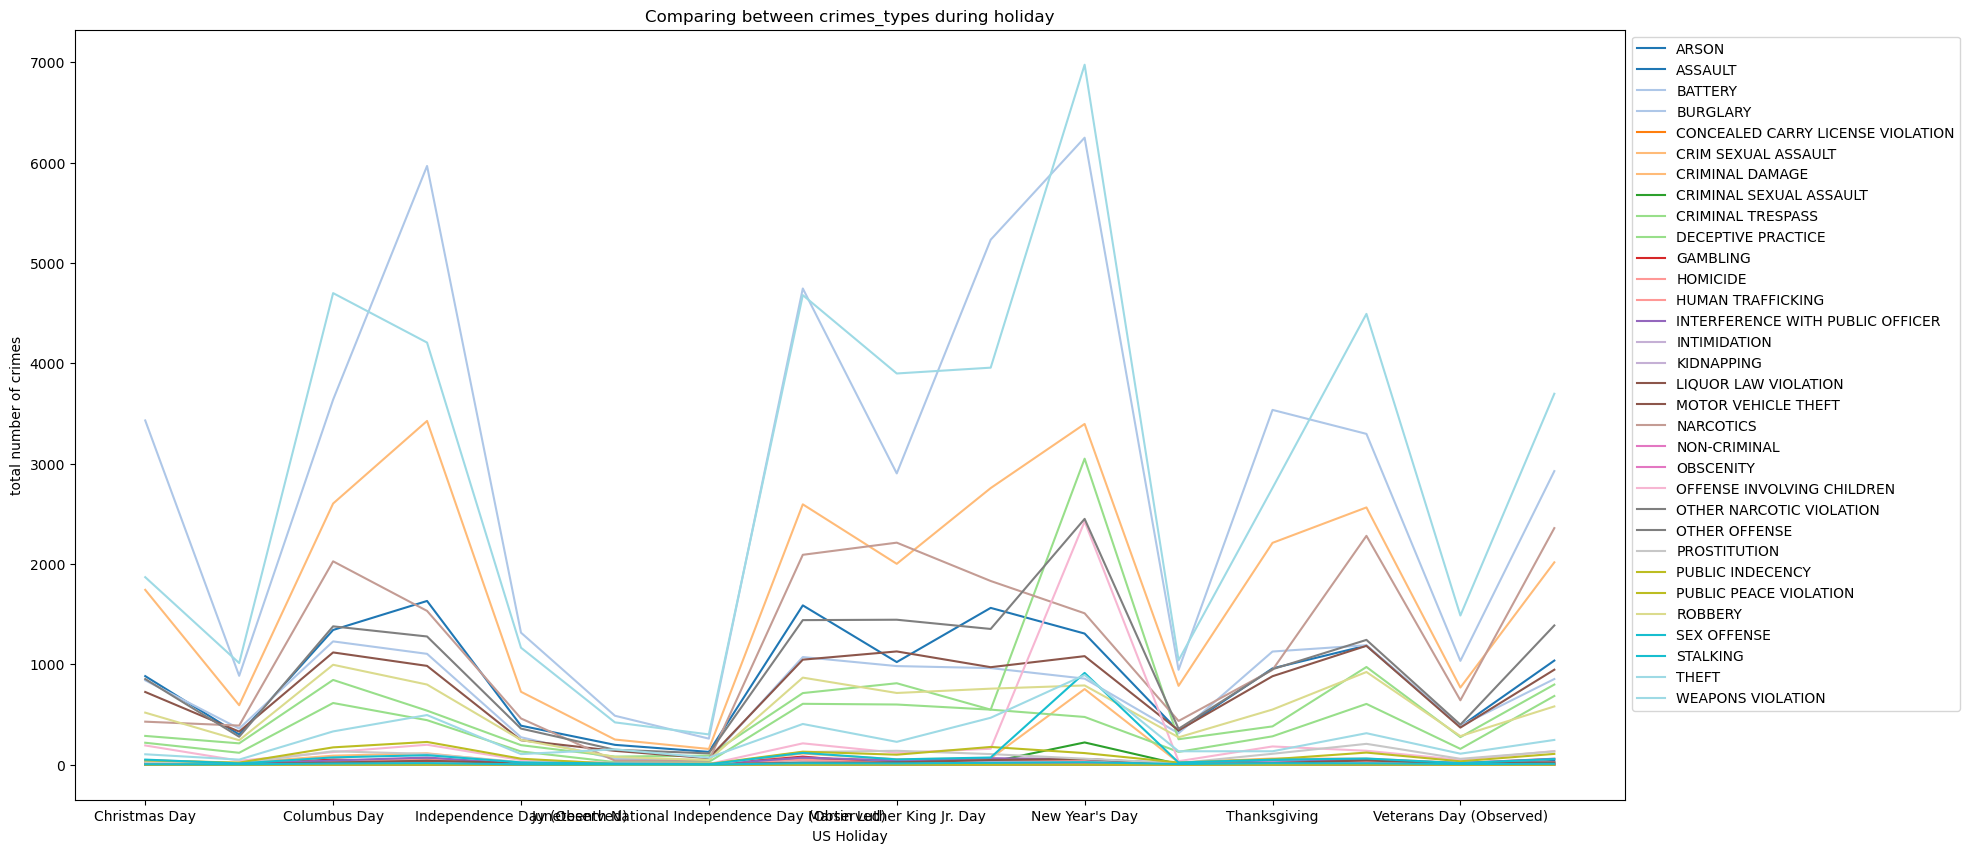

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Comparing between crimes_types during holiday')
ax.set_ylabel('total number of crimes')
unstacked_holiday.plot(ax=ax, colormap='tab20')
ax.legend(bbox_to_anchor=[1,1]);